# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.
Task 2:-Create a predictive model to classify whether a person is running or walking
based on the given predictor variables.

###  Import Libraries

In [1]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline 


# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [2]:
data=pd.read_csv('/kaggle/input/run-or-walk/dataset.csv')

### Exploratory Data Analysis

In [3]:
data.head(10)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473
7,2017-6-30,13:51:17:446569025,viktor,0,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348
8,2017-6-30,13:51:17:646152973,viktor,0,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759
9,2017-6-30,13:51:17:846502006,viktor,0,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982


## Summary Statistics

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wrist,88588.0,0.522170,0.499511,0.0000,0.000000,1.0000,1.000000,1.0000
activity,88588.0,0.500801,0.500002,0.0000,0.000000,1.0000,1.000000,1.0000
acceleration_x,88588.0,-0.074811,1.009299,-5.3505,-0.381800,-0.0595,0.355500,5.6033
acceleration_y,88588.0,-0.562585,0.658458,-3.2990,-1.033500,-0.7591,-0.241775,2.6680
acceleration_z,88588.0,-0.313956,0.486815,-3.7538,-0.376000,-0.2210,-0.085900,1.6403
gyro_x,88588.0,0.004160,1.253423,-4.4306,-0.920700,0.0187,0.888800,4.8742
gyro_y,88588.0,0.037203,1.198725,-7.4647,-0.644825,0.0393,0.733700,8.4980
gyro_z,88588.0,0.022327,1.914423,-9.4800,-1.345125,0.0069,1.398200,11.2662


### Checking Datatypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


#### Dimensions of the data

In [6]:
data.shape

(88588, 11)

Total 11 features in the dataset.

### Checking missing values in the dataset

In [7]:
data.isnull().sum()/ len(data)*100

date              0.0
time              0.0
username          0.0
wrist             0.0
activity          0.0
acceleration_x    0.0
acceleration_y    0.0
acceleration_z    0.0
gyro_x            0.0
gyro_y            0.0
gyro_z            0.0
dtype: float64

No features have missing values.

### Checking for duplicates

In [8]:
data.duplicated().sum()

0

No duplicate data present in the dataset

### Recheck the unique values

In [9]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

DATE :  12
date
2017-7-4      3225
2017-7-7      3280
2017-7-2      3933
2017-6-30     3992
2017-7-1      4201
2017-7-10     4337
2017-7-11     6696
2017-7-9      7788
2017-7-15     7934
2017-7-6     11357
2017-7-17    11365
2017-7-16    20480
Name: count, dtype: int64


TIME :  88588
time
13:51:15:847724020    1
13:51:17:246767997    1
13:51:17:446569025    1
13:51:17:646152973    1
13:51:17:846502006    1
                     ..
20:9:12:517301976     1
20:9:12:317988991     1
20:9:12:117035984     1
20:9:14:917038023     1
20:9:16:117410004     1
Name: count, Length: 88588, dtype: int64


USERNAME :  1
username
viktor    88588
Name: count, dtype: int64




In [10]:
data.drop(['date','time','username'], axis = 1,inplace=True)

### Analysis of Outliers

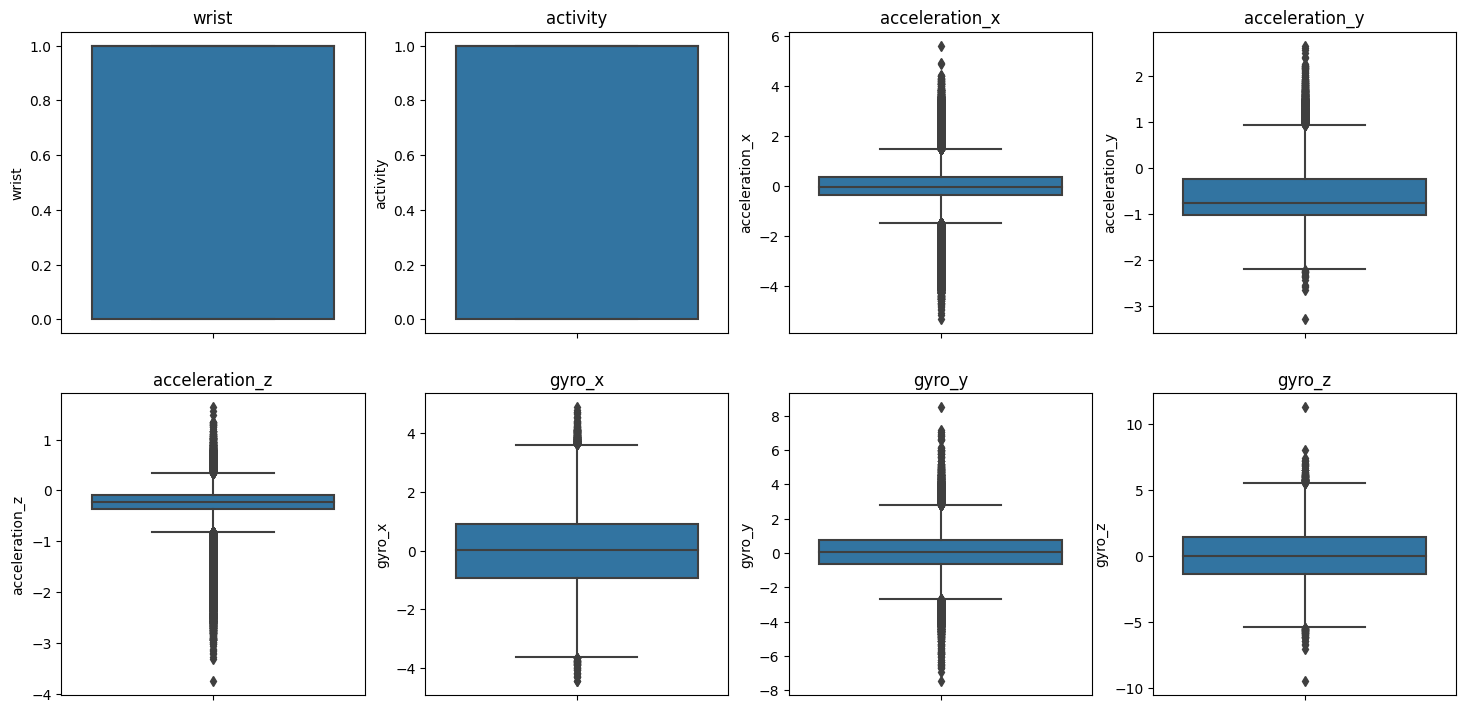

In [11]:
plt.figure(figsize=(18,18))
i=1
for x in data.columns:
    plt.subplot(4,4,i)
    sns.boxplot(y=data[x])
    plt.title(x)
    i+=1

# Classifying activities into walk and run:
    0: "walk"
    1: "run"


In [12]:
print('Data contains ' + str(pd.value_counts(data['activity'].values)[0]) +
      ' "walk" data samples as well as ' + str(pd.value_counts(data['activity'].values)[1]) + 
      ' "run" data samples')

Data contains 44223 "walk" data samples as well as 44365 "run" data samples


# Classifying wrist into left and right:
    0: "left"
    1: "right"

In [13]:
print('The data contains ' + str(pd.value_counts(data['wrist'].values)[0]) + 
      ' data samples collected on the left wrist as well as ' + str(pd.value_counts(data['wrist'].values)[1]) + 
      ' data samples collected on the right wrist')

The data contains 42330 data samples collected on the left wrist as well as 46258 data samples collected on the right wrist


## Data copy

In [14]:
df = data.copy()

In [15]:
Features = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

# populate dataframe with 'left' wrist only
df_left_wrist_data = pd.DataFrame()
df_left_wrist_data = df[df.wrist == 0]

# populate dataframe with 'right' wrist only
df_right_wrist_data = pd.DataFrame()
df_right_wrist_data = df[df.wrist == 1]

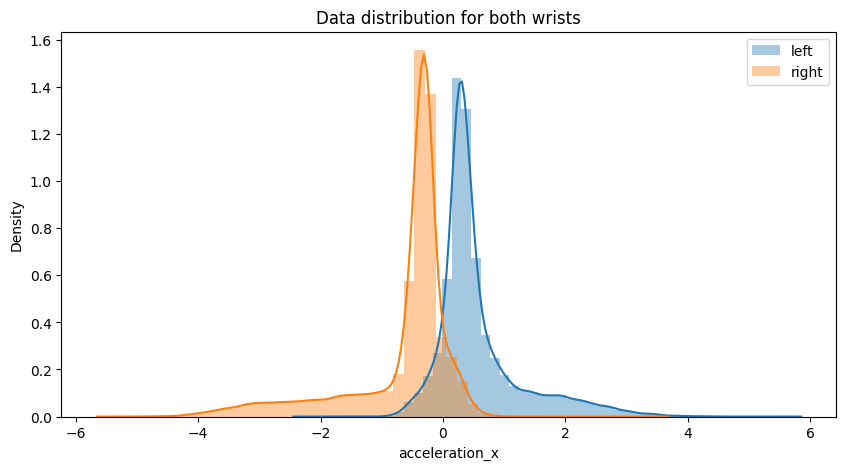

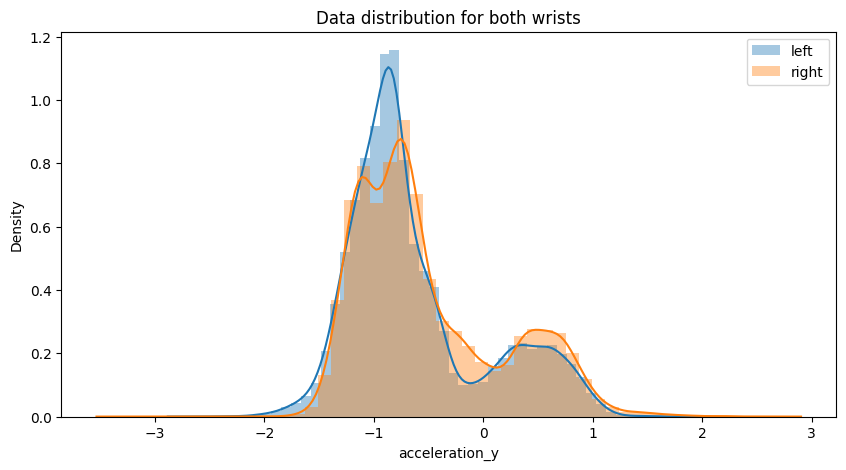

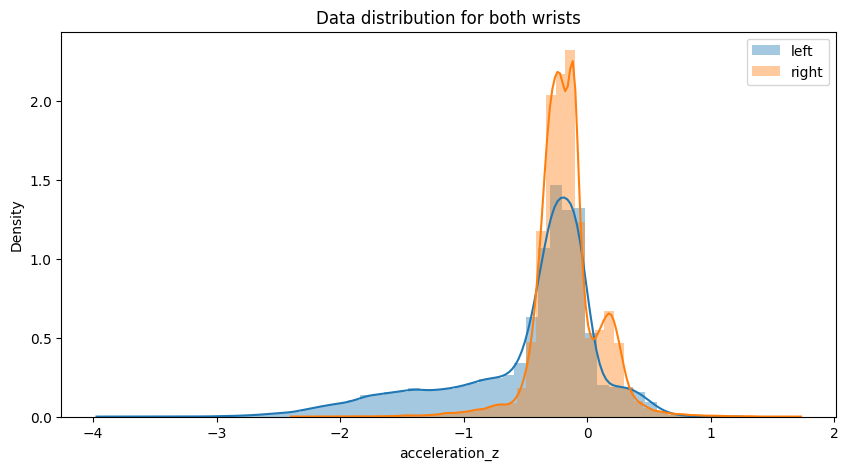

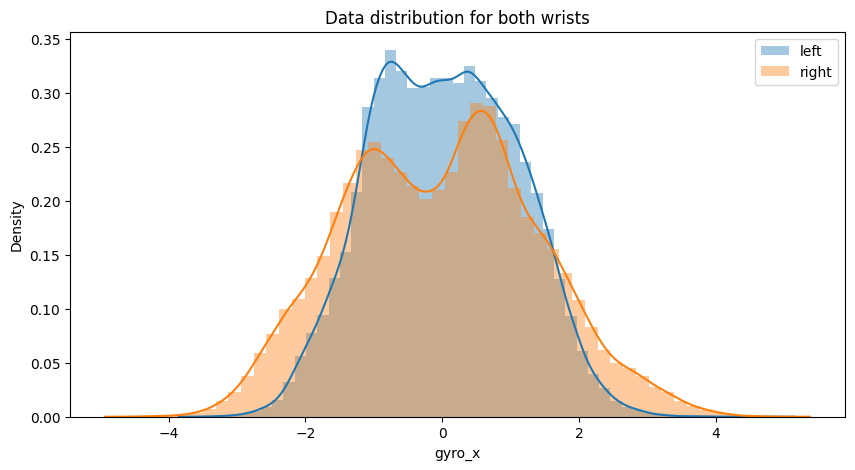

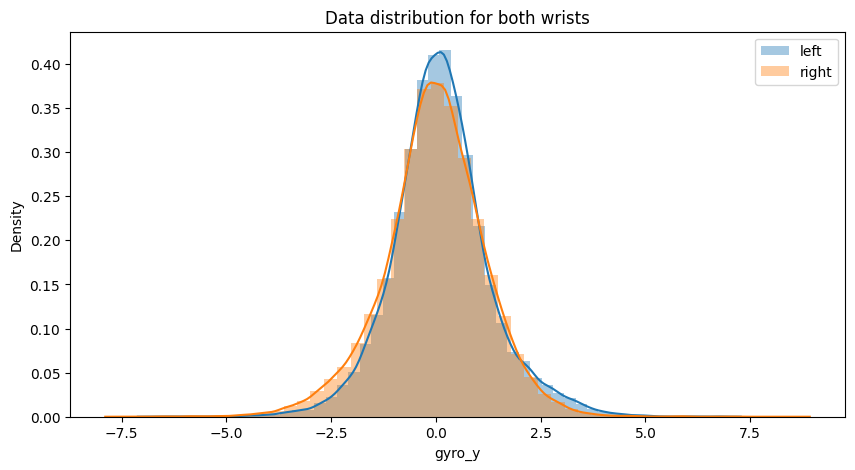

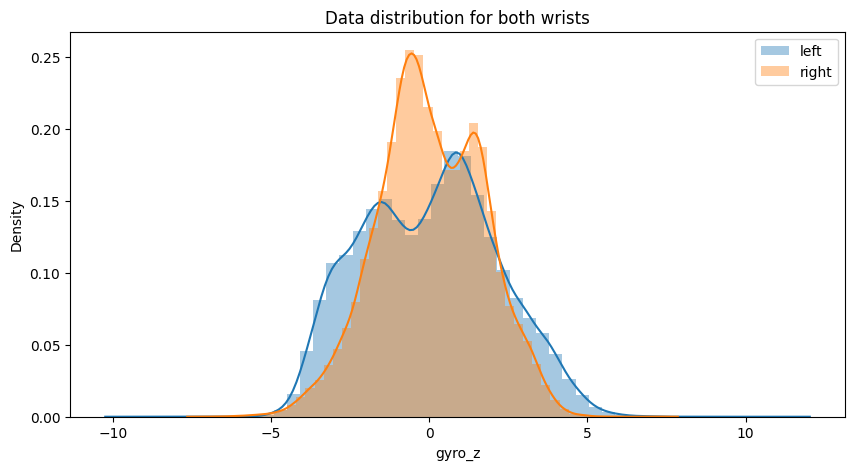

In [16]:
for c in Features:
    plt.figure(figsize=(10,5))
    plt.title("Data distribution for both wrists")
    sns.distplot(df_left_wrist_data[c], label='left')
    sns.distplot(df_right_wrist_data[c], label='right')
    plt.legend()
    plt.show()

Data is symmetrically distributed

### Correlation Plot

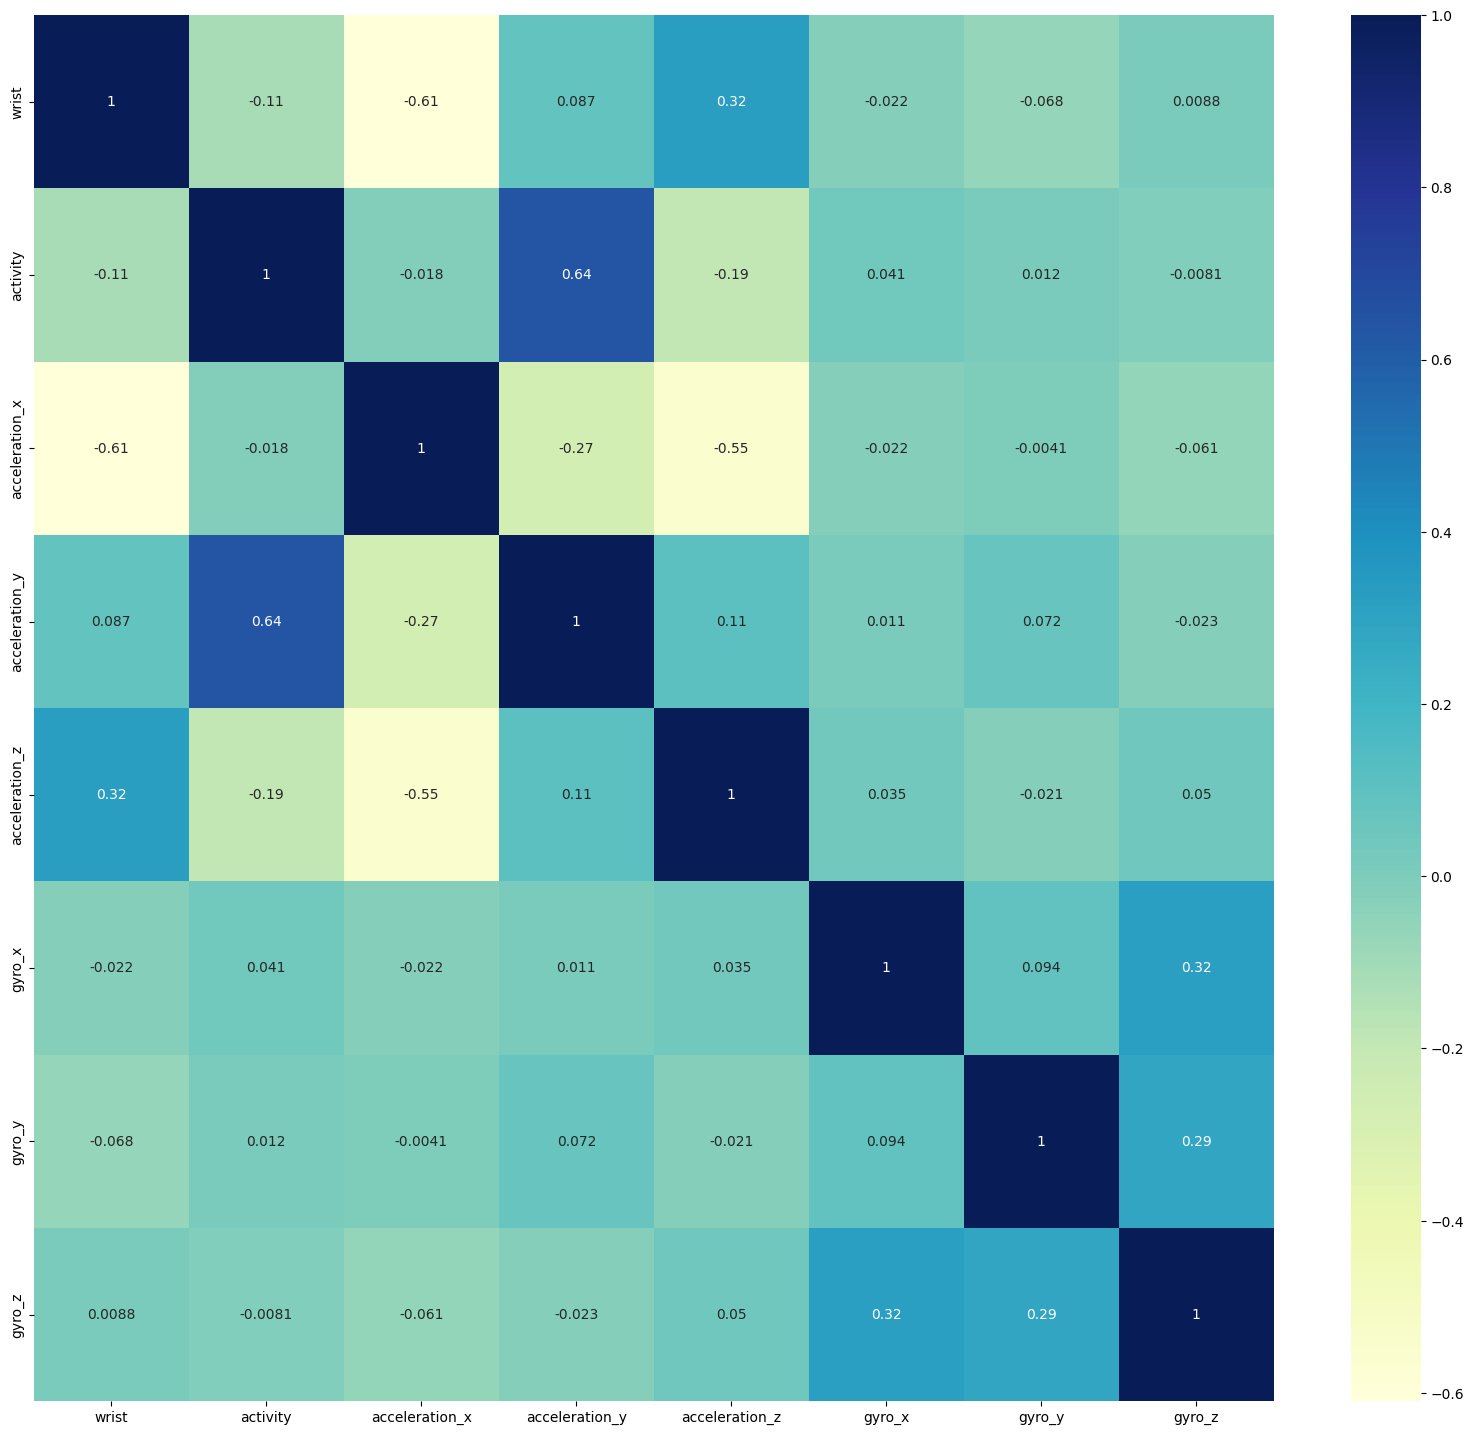

In [17]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)
plt.show()

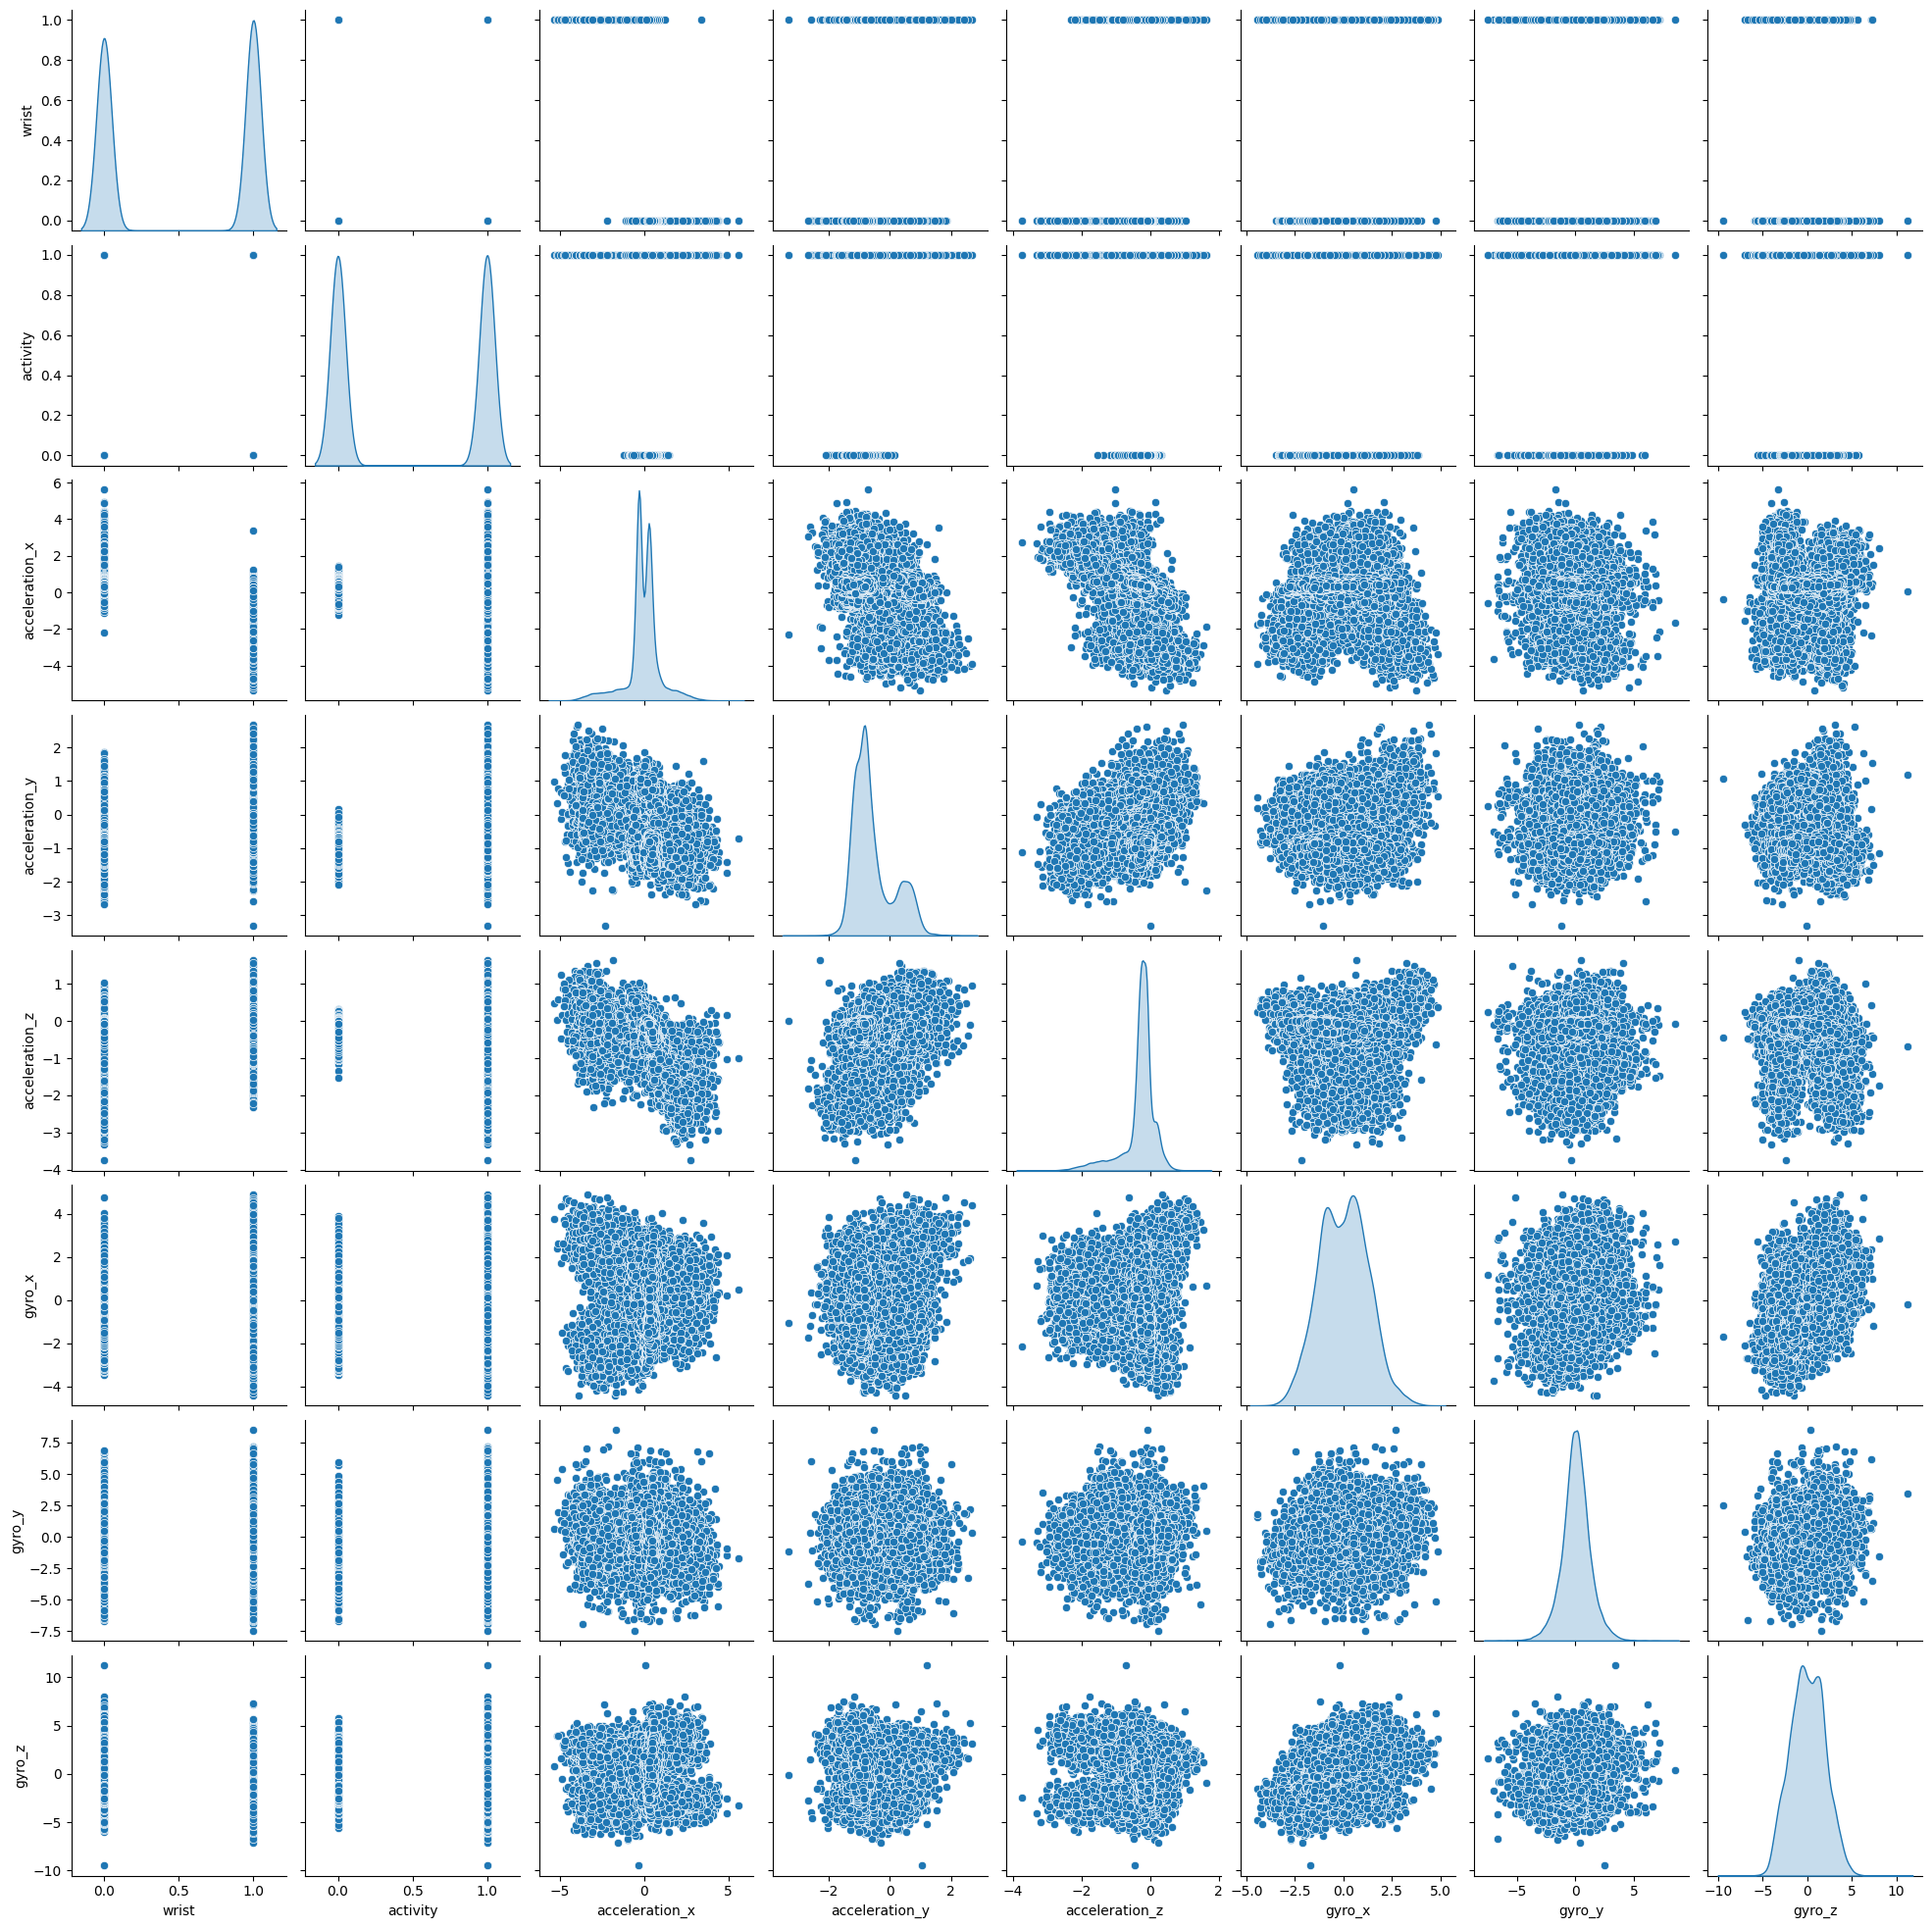

In [18]:
sns.pairplot(data, diag_kind='kde')

### Checking skewness of the dataset

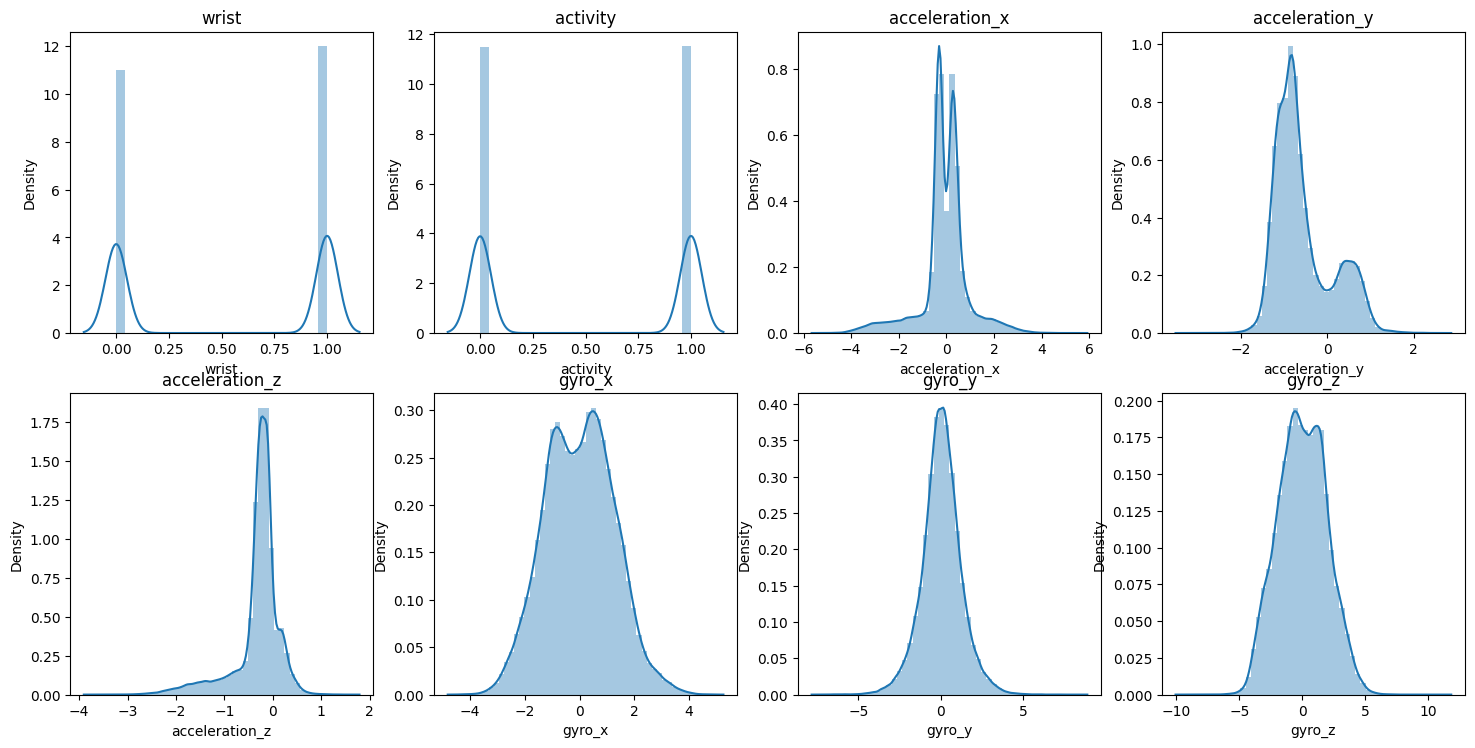

In [19]:
plt.figure(figsize=(18,18))
i=1
for x in data.columns:
    plt.subplot(4,4,i)
    sns.distplot(data[x])
    plt.title(x)
    i+=1

### Model Creation

In [20]:
data.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [21]:
x=data.drop(['wrist','activity'], axis=1)
y=data[['activity']]

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 0.33668266, -0.33231618,  0.6293112 , -0.05039065, -0.00392358,
        -1.5419494 ],
       [ 0.74013342, -0.85156246,  0.16342314, -0.14349622, -0.013684  ,
         0.05462392],
       [ 0.50997229, -1.39586742,  0.79323478, -0.72973418,  0.05764218,
        -1.28448139],
       ...,
       [ 0.52859919, -0.93463579,  0.06420624, -1.16015794, -0.26395131,
        -0.67066385],
       [ 0.3307379 , -0.44895295,  0.4890107 , -1.21321296,  0.34937044,
        -0.93910129],
       [ 0.3852315 , -0.36177911,  0.45778716,  0.09106279,  0.87409756,
         0.65768097]])

### Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=100) 
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((70870, 6), (17718, 6), (70870, 1), (17718, 1))

### Linear Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
lr_ac = accuracy_score(y_test,Y_pred)
print(lr_ac)

[[8020  878]
 [1683 7137]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      8898
           1       0.89      0.81      0.85      8820

    accuracy                           0.86     17718
   macro avg       0.86      0.86      0.86     17718
weighted avg       0.86      0.86      0.86     17718

0.8554577266057117


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(splitter='best',criterion='entropy',min_samples_split=3,min_samples_leaf=3)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [28]:
print(confusion_matrix(y_test,Y_pred_dt))
print(classification_report(y_test,Y_pred_dt))
dt_ac = accuracy_score(y_test,Y_pred_dt)
print(dt_ac)

[[8767  131]
 [ 142 8678]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8898
           1       0.99      0.98      0.98      8820

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718

0.9845919403995936


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',criterion='entropy')
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [30]:
print(confusion_matrix(y_test,Y_pred_rf))
print(classification_report(y_test,Y_pred_rf))
rf_ac = accuracy_score(y_test,Y_pred_rf)
print(rf_ac)

[[8830   68]
 [ 102 8718]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8898
           1       0.99      0.99      0.99      8820

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

0.9904052376114686


### XGradientBoosting

In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42,verbosity=0,silent=0)
xgb.fit(X_train,y_train)
Y_pred_xgb = xgb.predict(X_test)

In [32]:
print(confusion_matrix(y_test,Y_pred_xgb))
print(classification_report(y_test,Y_pred_xgb))
xgb_ac = accuracy_score(y_test,Y_pred_xgb)
print(xgb_ac)

[[8838   60]
 [ 104 8716]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8898
           1       0.99      0.99      0.99      8820

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

0.990743876284005


## Model Performances

Accuracy score comparison chart

In [33]:
Accuracy_Score_1 = pd.DataFrame([lr_ac,dt_ac,rf_ac,xgb_ac],
             index=['Logistic Regression','Decision Tree','Random Forest','XGradient Boosting'],columns=['Accuracy'])

In [34]:
Accuracy_Score_1

,Accuracy
Logistic Regression,0.855458
Decision Tree,0.984592
Random Forest,0.990405
XGradient Boosting,0.990744


In [35]:
Accuracy_Score = [lr_ac, dt_ac,rf_ac,xgb_ac]
Models = ['Logistic Regression', 'Decision Tree' , 'Random Forest BR','XGradient Boosting']

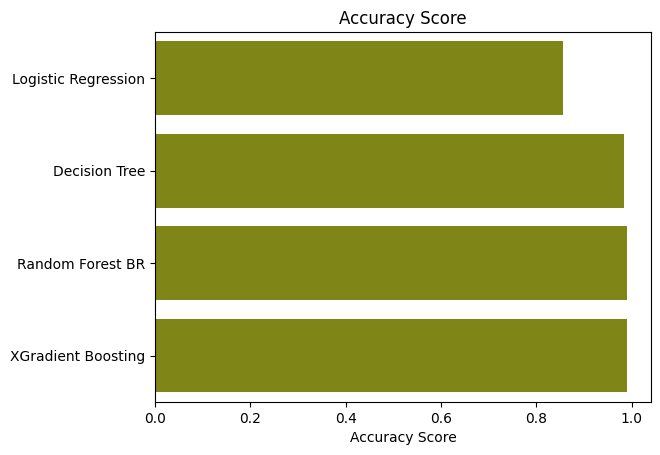

In [36]:
sns.barplot(x=Accuracy_Score, y=Models, color="xkcd:baby poop green")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()